### 딥러닝의 역사

* Perceptron
* Multilayer Perceptrons
* Backpropagation

### 딥러닝 네트워크의 아키텍쳐

Input Layer   => Hidden Layer(s) => Output Layer
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
Input Node(s) => Hidden Node(s)  => Output Node(s)


보통 Hidden layer가 갖는 hidden node의 개수를 점차 늘이다가 점차 줄이는 방향으로 설계를 한다.

딥러닝에서는 선형 회귀 대신에 Dense Layer 또는 Fully Connected Layer (FCL)라는 표현을 사용한다.

* Overfitting -
* Underfitting - 
* Best Fit - 

### 딥러닝에 사용되는 스킬

* 데이터 증강 기법 (Data augmentation) - 과적합을 해결하는 가장 좋은 방법은 데이터의 개수를 늘리는 것이다. 하지만 실무에서는 대게 데이터가 부족할 때가 태반이다. 이럴 때 데이터를 보충하기 위해 사용하는 방법 중 하나가 데이터 증강 기법이다. 데이터 증강 기법은 원본 데이터를 여러 가지 방법으로 변형하고 복사하여 여러 데이터로 증강시키는 것을 의미한다.

* 드랍 아웃 (Drop Out) - FCL이 항상 최선의 결과를 도출하는 것은 아니다. 레이어의 노드 일부를 랜덤하게 탈락시켜 연산해보는 방법을 드랍 아웃이라고 한다. 어떤 비율로 노드를 탈락시켜야 할지는 반복 실험을 통해 파악해야 한다.

"사공이 많은 배가 산으로 간다."

* 앙상블 (Ensemble) - 기법은 아니고 일종의 개념이다. 앙상블은 여러 뉴럴 네트워크를 통해 얻은 여러 결과를 종합하여 하나의 결과를 얻는 것을 의미한다.

* Learning Rate Decay - 실무에서 자주 사용되는 기법 중 하나로, local minimum에 빠르게 도달하고 싶을 때 사용한다. Learning Rate(미분 계수)를 변화시키면서 연산을 수행하는 것을 의미한다.

### 딥러닝 실습

In [1]:
# XOR 데이터 세트
import numpy as np
import tensorflow as tf

2023-05-16 21:09:37.187791: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-16 21:09:37.209889: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 21:09:37.387206: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 21:09:37.388427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 21:09:38.198999: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [3]:
x_data = np.array([[0,0], [1,0],[0,1],[1,1]], dtype=np.float32)
y_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

In [6]:
# Binary Logistic Regression 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
             metrics=["acc"])

model.fit(x_data, y_data, epochs=1000, verbose=0)

In [7]:
# XOR 문제는 이진 논리로 풀 수 없구나?
y_pred = model.predict(x_data)
y_pred

1/1 [==============================] - 0s 37ms/step


array([[0.49831092],
       [0.49977922],
       [0.49969065],
       [0.50115895]], dtype=float32)

In [10]:
# 다른 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation="relu")) # 히든 레이어를 추가한다.
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

model.fit(x_data, y_data, epochs=1000, verbose=0)

In [11]:
y_pred = model.predict(x_data)
y_pred

1/1 [==============================] - 0s 26ms/step


array([[0.08833533],
       [0.9844845 ],
       [0.9734549 ],
       [0.01520777]], dtype=float32)

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [14]:
#  실무에 Sequential API는 잘 사용되지 않는다. 대신 복잡한 연산을 위해 Functional API를 사용한다.
input = Input(shape=(2,))
hidden = Dense(8, activation="relu")(input)
output = Dense(1, activation="sigmoid")(hidden)
model = Model(inputs=input, outputs=output)

model.compile(loss=binary_crossentropy,
             optimizer=Adam(learning_rate=0.1))

model.summary()
# 맨 앞의 None은 배치 사이즈의 개수를 의미한다.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 24        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_data, y_data, epochs=1000, verbose=0)
y_pred = model.predict(x_data)

y_pred

1/1 [==============================] - 0s 28ms/step


array([[3.7591039e-05],
       [9.9998003e-01],
       [9.9998248e-01],
       [1.6362796e-05]], dtype=float32)

In [20]:
# 딥러닝 실습
import os
os.environ["KAGGLE_USERNAME"]="gyeongsugim"
os.environ["KAGGLE_KEY"]="13ef87a9410279c26d00c6ec2999b870"

In [21]:
!kaggle datasets download -d datamunge/sign-language-mnist

100%|██████████████████████████████████████| 62.6M/62.6M [00:06<00:00, 9.99MB/s]
100%|██████████████████████████████████████| 62.6M/62.6M [00:06<00:00, 9.58MB/s]


In [22]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD

2023-05-17 01:50:48.601686: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-17 01:50:48.604731: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 01:50:48.653357: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 01:50:48.654754: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 01:50:49.226924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [6]:
train_df = pd.read_csv("sign_mnist_train.csv")
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
test_df = pd.read_csv("sign_mnist_test.csv")
test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


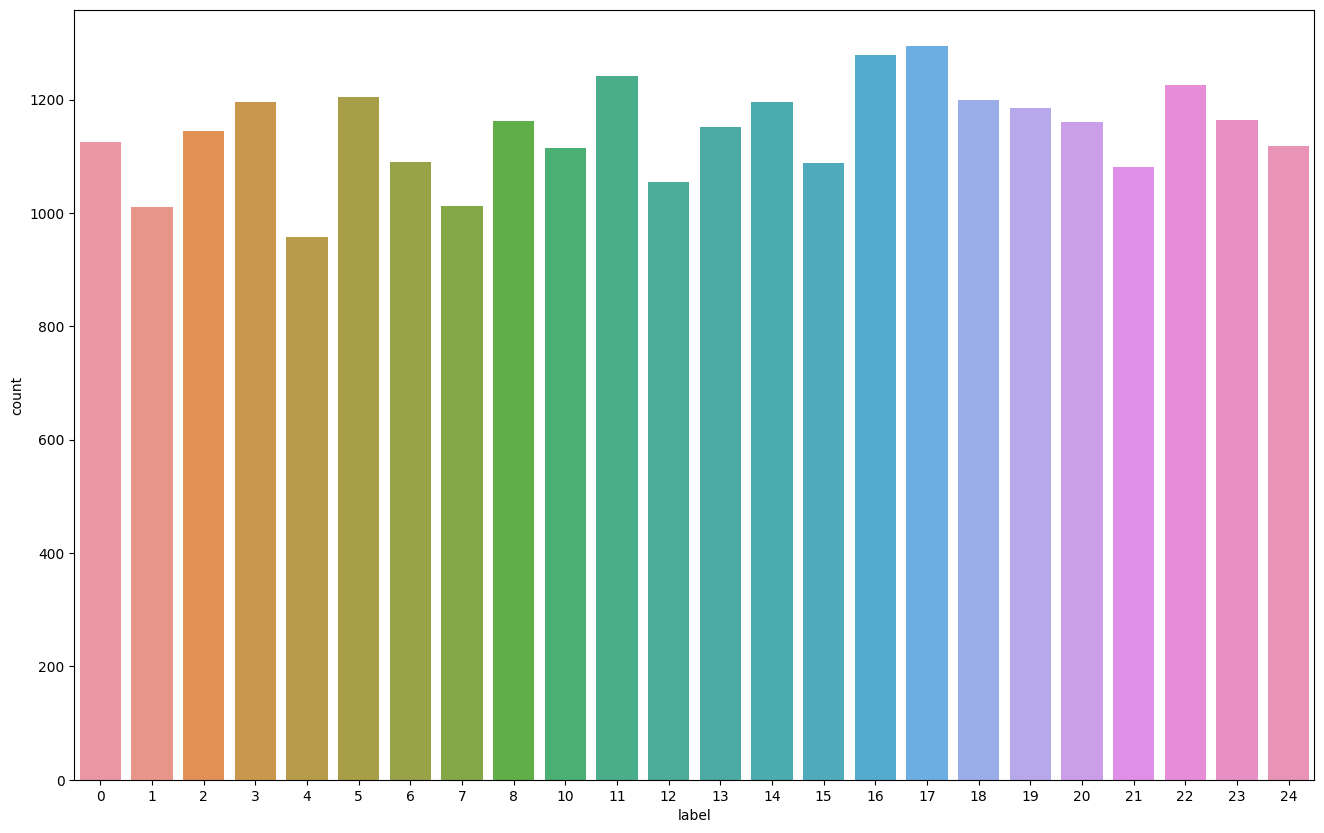

In [11]:
plt.figure(figsize=[16,10])
sbn.countplot(x=train_df["label"])
plt.show()

In [28]:
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=["label"]).values
y_train = train_df[["label"]].values

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=["label"]).values
y_test = test_df[["label"]].values


x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_test

((27455, 784),
 (27455, 1),
 (7172, 784),
 (7172, 1),
 array([[ 6.],
        [ 5.],
        [10.],
        ...,
        [ 2.],
        [ 4.],
        [ 2.]], dtype=float32))

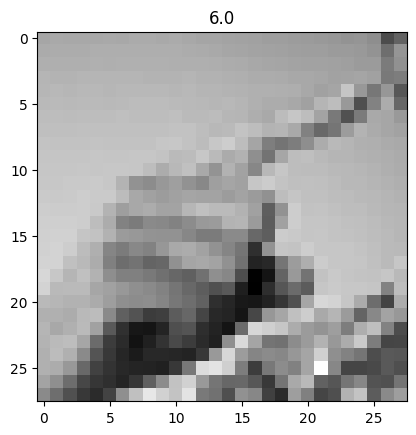

In [20]:
# 데이터 미리보기
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)), cmap="gray")
plt.show()

In [29]:
# One-hot Encoding
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

y_train.shape, y_test.shape

((27455, 24), (7172, 24))

In [30]:
x_train = x_train / 255.
x_test = x_test / 255.

In [33]:
input = Input(shape=(784,))
hidden = Dense(1024, activation="relu")(input)
hidden = Dense(512, activation="relu")(hidden)
hidden = Dense(256, activation="relu")(hidden)
output = Dense(24, activation="softmax")(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss="categorical_crossentropy",
             optimizer=Adam(learning_rate=0.001),
             metrics=["acc"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 24)                6168      
                                                                 
Total params: 1,466,136
Trainable params: 1,466,136
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(x_train, y_train,
                   validation_data=(x_test, y_test),
                   epochs=20)

Epoch 1/20
858/858 [==============================] - 6s 7ms/step - loss: 1.7066 - acc: 0.4436 - val_loss: 1.3808 - val_acc: 0.5848
Epoch 2/20
858/858 [==============================] - 6s 7ms/step - loss: 0.6189 - acc: 0.7819 - val_loss: 0.8575 - val_acc: 0.7500
Epoch 3/20
858/858 [==============================] - 6s 8ms/step - loss: 0.3053 - acc: 0.8948 - val_loss: 0.8302 - val_acc: 0.7366
Epoch 4/20
858/858 [==============================] - 6s 7ms/step - loss: 0.1729 - acc: 0.9421 - val_loss: 1.0805 - val_acc: 0.7386
Epoch 5/20
858/858 [==============================] - 6s 7ms/step - loss: 0.1049 - acc: 0.9663 - val_loss: 0.8035 - val_acc: 0.8035
Epoch 6/20
858/858 [==============================] - 6s 7ms/step - loss: 0.0989 - acc: 0.9679 - val_loss: 0.9332 - val_acc: 0.8054
Epoch 7/20
858/858 [==============================] - 6s 7ms/step - loss: 0.0701 - acc: 0.9780 - val_loss: 0.7431 - val_acc: 0.8455
Epoch 8/20
858/858 [==============================] - 6s 7ms/step - loss: 0.

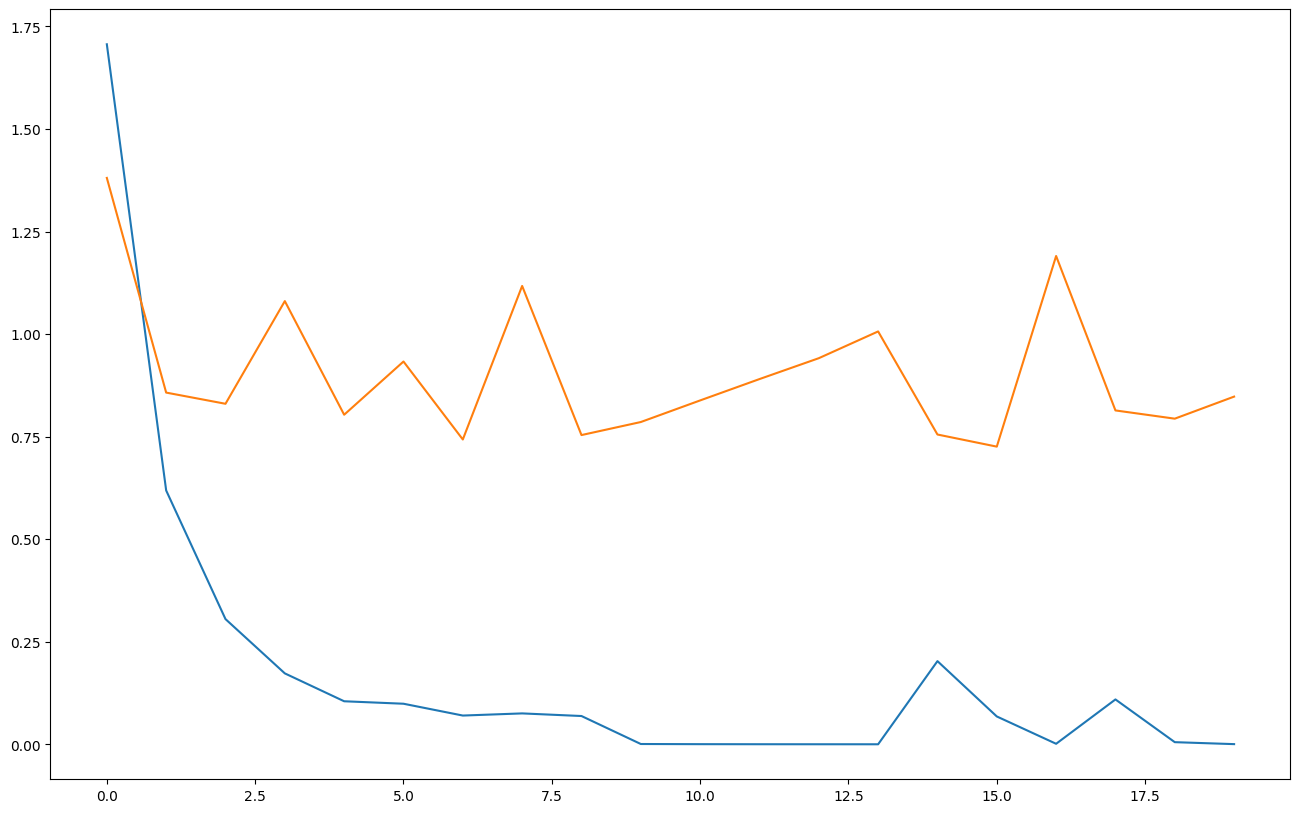

In [35]:
plt.figure(figsize=(16,10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

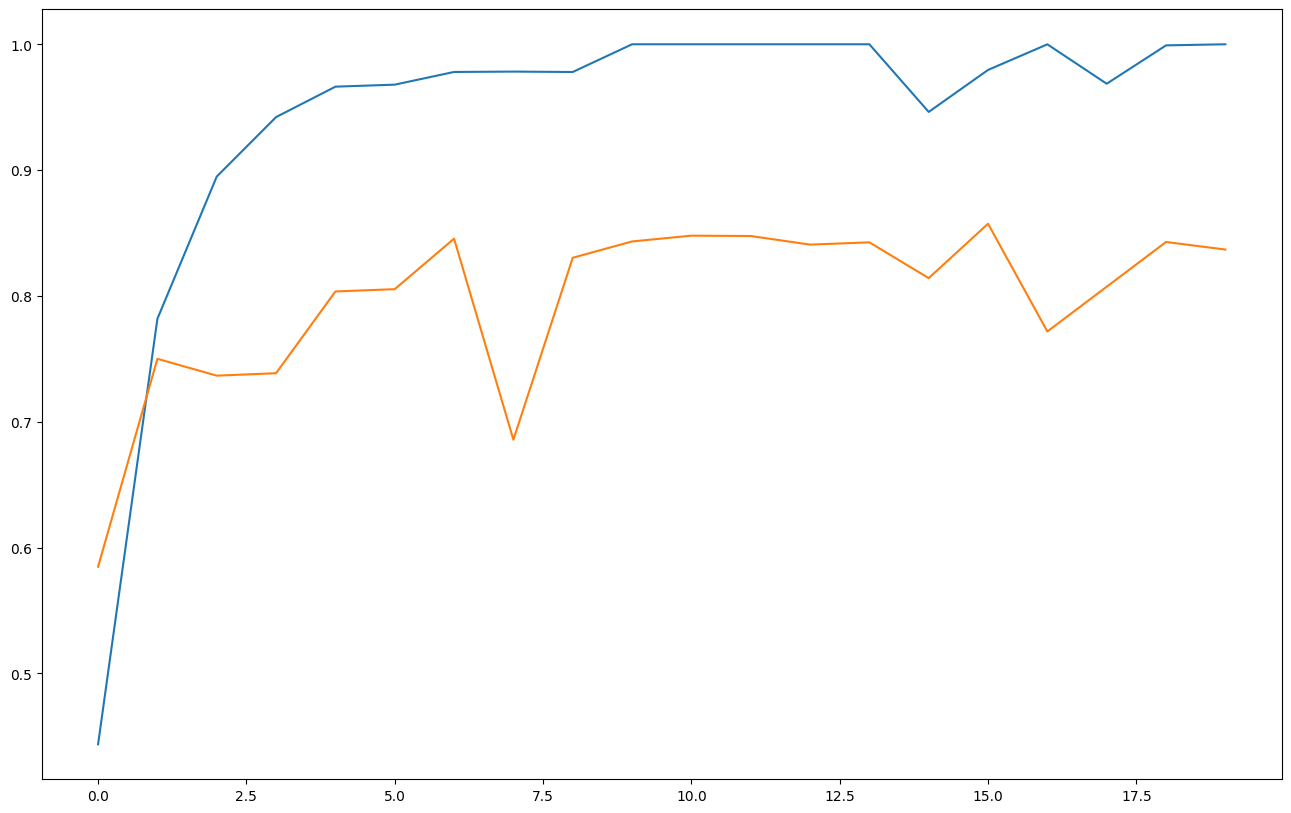

In [36]:
plt.figure(figsize=(16,10))
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])